In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hitters.csv")
df.dropna(inplace=True)

In [4]:
# get_dummies converts categorical variables to numeric data (get dummy variables)
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [5]:
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
lasso_model = Lasso().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [8]:
lasso_model.intercept_

-5.587450677336506

In [9]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

**Different coefficients for different λ values**

In [10]:
alphas1 = 10**np.linspace(10,-2,100)*0.5
alphas2 = np.random.randint(0,100000,10)

In [11]:
lasso = Lasso()
coefs = []

for i in alphas2:
  lasso.set_params(alpha=i)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.359e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


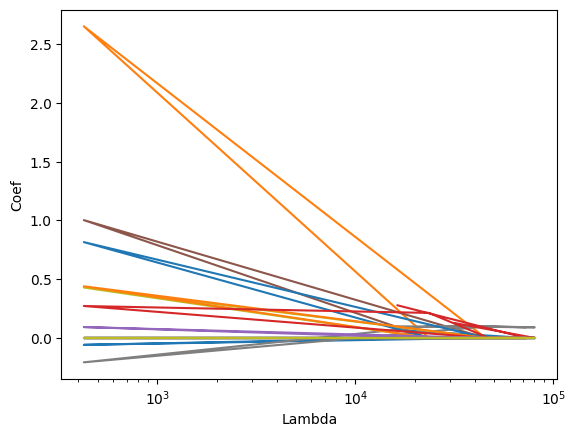

In [12]:
ax = plt.gca()  # gca : get current axes
ax.plot(alphas2,coefs)
ax.set_xscale("log") # x-axis is set to logarithmic
plt.xlabel("Lambda")
plt.ylabel("Coef")
plt.show()
# farklı lambda değerlerine karşı oluşan beta katsayıları
# lambda değerleri arttıkça katsayılar sıfıra yaklaşmış ve sıfır olmuş

In [15]:
lasso = Lasso(max_iter=10000)
coefs = []

for i in alphas1:
  lasso.set_params(alpha=i)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

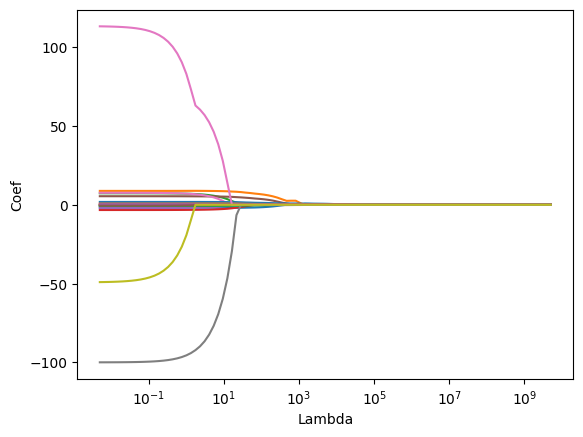

In [16]:
ax = plt.gca()  # gca : get current axes
ax.plot(alphas1,coefs)
ax.set_xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coef")
plt.show()

**prediction**

In [18]:
# train set prediction
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [23]:
# test set prediction
y_pred = lasso_model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mse

126805.49250375385

In [25]:
rmse = np.sqrt(mse)
rmse

356.0975884554034

In [29]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
r2score

0.41422798132366156

**Model Tuning**
> **lassoCV function is used for optimum alpha value**





In [30]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv=10, max_iter=100000).fit(X_train, y_train)

In [32]:
lasso_cv_model.alpha_

563.4670501833853

In [33]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)
# lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [34]:
y_pred = lasso_tuned.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

373.59572250697937

In [36]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)
# 0 çıkan değerler anlamsız olan katsayılardır

,0
AtBat,-0.000000
Hits,2.533141
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,0.520003
Years,0.000000
CAtBat,-0.188935
CHits,0.360895
CHmRun,-0.000000


In [44]:
# independent variables (X)
known_input = [150, 420, 780, 230, 560, 300, 670, 85, 90, 340,
               720, 510, 120, 480, 610, 740, 310, 220, 190]

prediction = lasso_tuned.predict([known_input])
print(prediction)

[2192.79597598]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
